In [1]:
import snapatac2 as snap

snap.__version__


'2.8.0'

In [2]:
fragment_file = "/data2st1/junyi/WT_W26/outs/fragments.tsv.gz"
chromzie_file = "/data2st1/junyi/ref/mm10.chrom.sizes"

# Load the fragment file
data = snap.pp.import_fragments(fragment_file, chrom_sizes=snap.genome.GRCm39, sorted_by_barcode=False)


In [3]:
data

AnnData object with n_obs × n_vars = 22830 × 0
    obs: 'n_fragment', 'frac_dup', 'frac_mito'
    uns: 'reference_sequences'
    obsm: 'fragment_paired'

2025-02-06 17:47:03 - INFO - Computing fragment size distribution...


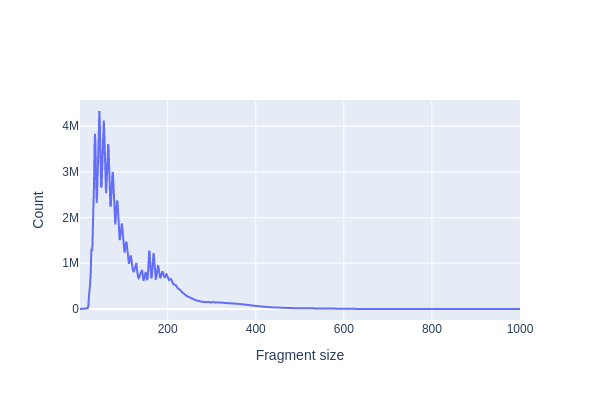

In [4]:
snap.pl.frag_size_distr(data, interactive=False)


In [5]:
fig = snap.pl.frag_size_distr(data, show=False)
fig.update_yaxes(type="log")
fig.show()



In [6]:
snap.metrics.tsse(data, snap.genome.GRCm39)

/home/junyichen/anaconda3/envs/snapatac2/lib/python3.10/site-packages/snapatac2/plotting/__init__.py:97: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/home/junyichen/anaconda3/envs/snapatac2/lib/python3.10/site-packages/snapatac2/plotting/__init__.py:98: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



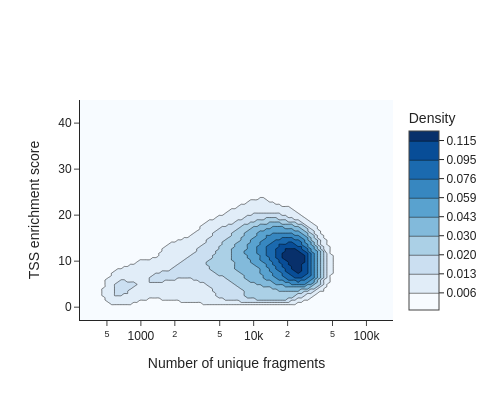

In [7]:
snap.pl.tsse(data, interactive=False)


In [8]:
snap.pp.filter_cells(data, min_counts=3000, min_tsse=0, max_counts=100000)


/home/junyichen/anaconda3/envs/snapatac2/lib/python3.10/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning:

Transforming to str index.

/home/junyichen/anaconda3/envs/snapatac2/lib/python3.10/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning:

Transforming to str index.



In [9]:
snap.pp.add_tile_matrix(data)


In [10]:
snap.pp.select_features(data, n_features=250000)


2025-02-06 17:47:48 - INFO - Selected 250000 features.


In [11]:
snap.tl.spectral(data)


In [12]:
snap.tl.umap(data)


/home/junyichen/anaconda3/envs/snapatac2/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning:

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html

/home/junyichen/anaconda3/envs/snapatac2/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/home/junyichen/anaconda3/envs/snapatac2/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.

/home/junyichen/anaconda3/envs/snapatac2/lib/python3.10/site-packages/numba/np/ufunc/parallel.py:371: NumbaWarning:

The TBB threading layer requires TBB version 2021 update 6 or later i.e., TBB_INTERFACE_VERSION >= 12060. Found TBB_INTERFACE_VERSION = 12050. The TBB threading layer is disabled.



In [13]:
snap.pp.knn(data)
snap.tl.leiden(data)


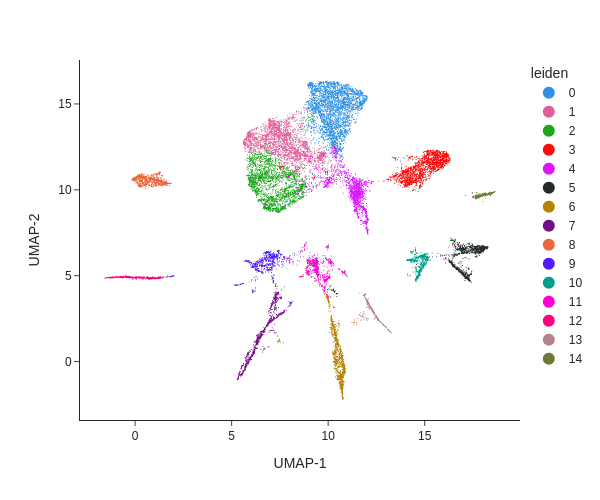

In [14]:
snap.pl.umap(data, color='leiden', interactive=False, height=500)


In [15]:
import pandas as pd
df_meta = pd.read_csv("output/merged-all-pfc-annotated.csv",index_col=0)

/tmp/ipykernel_1554297/985952135.py:2: DtypeWarning:

Columns (1,2,17,18,19,20,21,22,23,25,26,31,32,36,37,41,42,43,44,45,46,47,56,85) have mixed types. Specify dtype option on import or set low_memory=False.



In [16]:
df_meta=df_meta.loc[df_meta.batch=="atac"]

In [17]:
df_meta.index = df_meta.index.str.split("_").str[1].str.split("-3").str[0]

In [18]:
df_meta.dropna(axis=1,how="all",inplace=True)

In [19]:
data.obs = data.obs.merge(df_meta,left_index=True,right_index=True,how="left")

In [20]:
data.obs

n_fragment  frac_dup  frac_mito       tsse leiden_x  \
AAACGAAAGACACGGT-1       29663  0.186290        0.0   5.795455        2   
AAACGAAAGAGGTACC-1       14582  0.347824        0.0  12.305374        1   
AAACGAAAGCGTCAAG-1       34208  0.181744        0.0  10.326440        1   
AAACGAAAGGCAAGCT-1       33539  0.169148        0.0  10.759578        9   
AAACGAAAGGCTCAGA-1        3607  0.301781        0.0   6.595365        0   
...                        ...       ...        ...        ...      ...   
TTTGTGTTCCGTACGG-1        9470  0.161130        0.0  16.997886        0   
TTTGTGTTCCTATCAT-1        5696  0.152507        0.0  16.707617        1   
TTTGTGTTCCTGACCT-1       27016  0.167098        0.0   5.612778       11   
TTTGTGTTCTACATCT-1       10930  0.260537        0.0   2.259887        4   
TTTGTGTTCTGACTTT-1       22759  0.222685        0.0  11.996679        3   

                   predicted_doublet batch  leiden_y PassBasicQC  \
AAACGAAAGACACGGT-1              True  atac       4.0        True   
AAACGAAAGAGGTACC-1              True  atac       0.0        True   
AAACGAAAGCGTCAAG-1              True  atac      10.0        True   
AAACGAAAGGCAAGCT-1              True  atac      12.0        True   
AAACGAAAGGCTCAGA-1               NaN   NaN       NaN         NaN   
...                              ...   ...       ...         ...   
TTTGTGTTCCGTACGG-1              True  atac       0.0        True   
TTTGTGTTCCTATCAT-1               NaN   NaN       NaN         NaN   
TTTGTGTTCCTGACCT-1              True  atac       8.0        True   
TTTGTGTTCTACATCT-1               NaN   NaN       NaN         NaN   
TTTGTGTTCTGACTTT-1              True  atac       1.0        True   

                       orig.ident  ...  nCount_ACTIVITY  nFeature_ACTIVITY  \
AAACGAAAGACACGGT-1  SeuratProject  ...          17721.0             7257.0   
AAACGAAAGAGGTACC-1  SeuratProject  ...           9815.0             5263.0   
AAACGAAAGCGTCAAG-1  SeuratProject  ...          20537.0             8334.0   
AAACGAAAGGCAAGCT-1  SeuratProject  ...          20641.0             9027.0   
AAACGAAAGGCTCAGA-1            NaN  ...              NaN                NaN   
...                           ...  ...              ...                ...   
TTTGTGTTCCGTACGG-1  SeuratProject  ...           6634.0             4238.0   
TTTGTGTTCCTATCAT-1            NaN  ...              NaN                NaN   
TTTGTGTTCCTGACCT-1  SeuratProject  ...          15515.0             7603.0   
TTTGTGTTCTACATCT-1            NaN  ...              NaN                NaN   
TTTGTGTTCTGACTTT-1  SeuratProject  ...          13059.0             6609.0   

                      umap_0     umap_1  umap_seurat_0  umap_seurat_1  \
AAACGAAAGACACGGT-1  0.921462   3.506158       4.895396      -1.204798   
AAACGAAAGAGGTACC-1 -3.002513  -0.678323      -0.628606      -3.021934   
AAACGAAAGCGTCAAG-1  4.752184   4.585594       7.272293       3.575043   
AAACGAAAGGCAAGCT-1  1.740934   5.266254      -1.826086      -0.144068   
AAACGAAAGGCTCAGA-1       NaN        NaN            NaN            NaN   
...                      ...        ...            ...            ...   
TTTGTGTTCCGTACGG-1 -3.214589  -1.696346       4.180927      -4.513350   
TTTGTGTTCCTATCAT-1       NaN        NaN            NaN            NaN   
TTTGTGTTCCTGACCT-1  4.159524   2.239313      -5.858563       7.003504   
TTTGTGTTCTACATCT-1       NaN        NaN            NaN            NaN   
TTTGTGTTCTGACTTT-1 -1.382187  10.422669      -3.732286       3.417343   

                    celltype.L1  celltype.L2  celltype.L2.p  celltype.L1.p  
AAACGAAAGACACGGT-1       Neuron          NaN            NaN         Neuron  
AAACGAAAGAGGTACC-1       Neuron        L6 CT          L6 CT         Neuron  
AAACGAAAGCGTCAAG-1       Neuron          NaN            NaN         Neuron  
AAACGAAAGGCAAGCT-1          NaN          NaN            NaN         Neuron  
AAACGAAAGGCTCAGA-1          NaN          NaN            NaN            NaN  
...                       

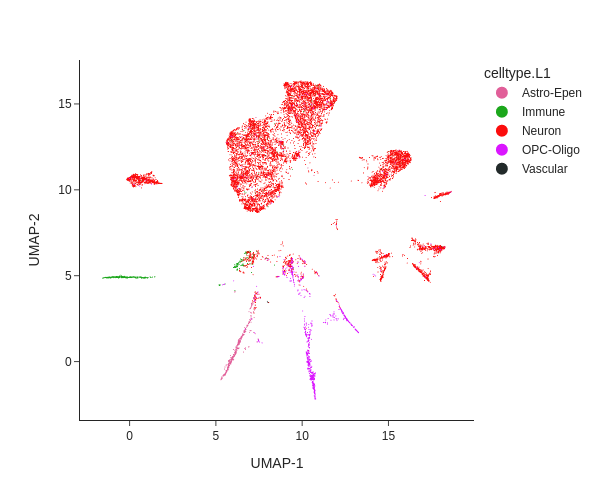

In [21]:
snap.pl.umap(data, color='celltype.L1', interactive=False, height=500)


In [22]:
gene_matrix = snap.pp.make_gene_matrix(data, snap.genome.GRCm39)


In [23]:
data.obs['predicted_doublet'].fillna('False',inplace=True)
data.obs["predicted_doublet"] = data.obs["predicted_doublet"].astype(bool)
data.obs['PassBasicQC'] = data.obs["PassBasicQC"].astype(bool)

In [24]:
data.write_h5ad("output/atac_snapatac2.h5ad")

... storing 'leiden_x' as categorical
... storing 'batch' as categorical
... storing 'orig.ident' as categorical
... storing 'celltype.L1' as categorical
... storing 'celltype.L2' as categorical
... storing 'celltype.L2.p' as categorical
... storing 'celltype.L1.p' as categorical


In [25]:
data.obs['celltype.L1'] = data.obs['celltype.L1'].cat.add_categories('Unknown')
data.obs['celltype.L1'].fillna('Unknown', inplace=True)


In [26]:
snap.tl.macs3(data, groupby='celltype.L1')


2025-02-06 17:49:35 - INFO - Exporting fragments...
2025-02-06 17:51:41 - INFO - Calling peaks...
100%|██████████| 6/6 [22:48<00:00, 228.16s/it]


In [27]:
peaks = snap.tl.merge_peaks(data.uns['macs3'], snap.genome.GRCm39)
peaks.head()


shape: (5, 7)
┌──────────────────────┬────────┬───────────┬────────┬─────────┬────────────┬──────────┐
│ Peaks                ┆ Immune ┆ OPC-Oligo ┆ Neuron ┆ Unknown ┆ Astro-Epen ┆ Vascular │
│ ---                  ┆ ---    ┆ ---       ┆ ---    ┆ ---     ┆ ---        ┆ ---      │
│ str                  ┆ bool   ┆ bool      ┆ bool   ┆ bool    ┆ bool       ┆ bool     │
╞══════════════════════╪════════╪═══════════╪════════╪═════════╪════════════╪══════════╡
│ chr1:3051685-3052186 ┆ false  ┆ true      ┆ true   ┆ true    ┆ false      ┆ false    │
│ chr1:3055686-3056187 ┆ false  ┆ false     ┆ true   ┆ true    ┆ false      ┆ false    │
│ chr1:3082706-3083207 ┆ false  ┆ false     ┆ true   ┆ false   ┆ false      ┆ false    │
│ chr1:3165196-3165697 ┆ false  ┆ true      ┆ true   ┆ true    ┆ false      ┆ false    │
│ chr1:3183734-3184235 ┆ false  ┆ false     ┆ true   ┆ false   ┆ false      ┆ false    │
└──────────────────────┴────────┴───────────┴────────┴─────────┴────────────┴──────────┘

In [28]:
peak_mat = snap.pp.make_peak_matrix(data, use_rep=peaks['Peaks'])
peak_mat


AnnData object with n_obs × n_vars = 18777 × 325262
    obs: 'n_fragment', 'frac_dup', 'frac_mito', 'tsse', 'leiden_x', 'predicted_doublet', 'batch', 'leiden_y', 'PassBasicQC', 'orig.ident', 'nCount_peaks', 'nFeature_peaks', 'total', 'duplicate', 'chimeric', 'unmapped', 'lowmapq', 'mitochondrial', 'nonprimary', 'passed_filters', 'is__cell_barcode', 'excluded_reason', 'TSS_fragments', 'DNase_sensitive_region_fragments', 'enhancer_region_fragments', 'promoter_region_fragments', 'on_target_fragments', 'blacklist_region_fragments', 'peak_region_fragments', 'peak_region_cutsites', 'nCount_ACTIVITY', 'nFeature_ACTIVITY', 'umap_0', 'umap_1', 'umap_seurat_0', 'umap_seurat_1', 'celltype.L1', 'celltype.L2', 'celltype.L2.p', 'celltype.L1.p'

In [29]:
marker_peaks = snap.tl.marker_regions(peak_mat, groupby='celltype.L1', pvalue=0.05)


In [67]:
marker_peaks['Astro-Epen']

Index(['chr1:4496954-4497455', 'chr1:4681862-4682363', 'chr1:4724165-4724666',
       'chr1:4890304-4890805', 'chr1:4984603-4985104', 'chr1:5039880-5040381',
       'chr1:5040744-5041245', 'chr1:5090684-5091185', 'chr1:5103407-5103908',
       'chr1:5104543-5105044',
       ...
       'chrX:168500675-168501176', 'chrX:168611023-168611524',
       'chrX:168621249-168621750', 'chrX:168627163-168627664',
       'chrX:168629145-168629646', 'chrX:168708557-168709058',
       'chrX:168733921-168734422', 'chrX:169094401-169094902',
       'chrX:169093853-169094354', 'chrY:808933-809434'],
      dtype='object', length=14404)

2025-02-06 18:14:50 - WARNING - Input contains 67574 peaks, only 50000 peaks will be plotted.


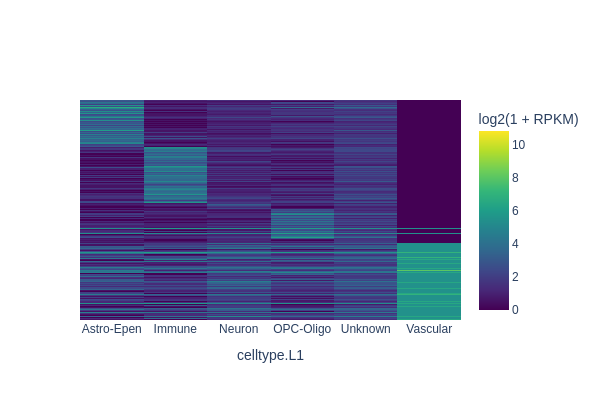

In [30]:
snap.pl.regions(peak_mat, groupby='celltype.L1', peaks=marker_peaks, interactive=False)


In [31]:
marker_peaks

{'Astro-Epen': Index(['chr1:4496954-4497455', 'chr1:4681862-4682363', 'chr1:4724165-4724666',
        'chr1:4890304-4890805', 'chr1:4984603-4985104', 'chr1:5039880-5040381',
        'chr1:5040744-5041245', 'chr1:5090684-5091185', 'chr1:5103407-5103908',
        'chr1:5104543-5105044',
        ...
        'chrX:168500675-168501176', 'chrX:168611023-168611524',
        'chrX:168621249-168621750', 'chrX:168627163-168627664',
        'chrX:168629145-168629646', 'chrX:168708557-168709058',
        'chrX:168733921-168734422', 'chrX:169094401-169094902',
        'chrX:169093853-169094354', 'chrY:808933-809434'],
       dtype='object', length=14404),
 'Immune': Index(['chr1:9701156-9701657', 'chr1:9876072-9876573', 'chr1:9927745-9928246',
        'chr1:9946872-9947373', 'chr1:9963261-9963762',
        'chr1:13276996-13277497', 'chr1:13583969-13584470',
        'chr1:13584908-13585409', 'chr1:13663354-13663855',
        'chr1:13718095-13718596',
        ...
        'chrX:166124809-166125310', '

In [49]:
from snapatac2._snapatac2 import read_motifs, PyDNAMotif

def cis_bp_mouse(unique: bool = True , path="data/motifdb/Mus_musculus.meme") -> list[PyDNAMotif]:
    motifs = read_motifs(path)
    for motif in motifs:
        motif.name = motif.id.split('+')[0]
    if unique:
        unique_motifs = {}
        for motif in motifs:
            name = motif.name
            if (
                    name not in unique_motifs or 
                    unique_motifs[name].info_content() < motif.info_content()
               ):
               unique_motifs[name] = motif
        motifs = list(unique_motifs.values())
    return motifs


In [50]:
motifs = snap.tl.motif_enrichment(
    motifs=cis_bp_mouse(unique=True,path="data/motifdb/Mus_musculus.meme"),
    regions=marker_peaks,
    genome_fasta=snap.genome.GRCm39,
)


2025-02-07 11:36:44 - INFO - Fetching 67574 sequences ...


2025-02-07 11:36:45 - INFO - Computing enrichment ...
100%|██████████| 790/790 [05:23<00:00,  2.44it/s]


In [61]:
import polars as pl

In [87]:
filtered_motifs = {}
for celltype, celltype_motifs in motifs.items():
    celltyoen_motifs = motifs[celltype]
    filtered = celltyoen_motifs.sort(["adjusted p-value","log2(fold change)"],descending=[False,True]).head(100)
    filtered_motifs[celltype] = filtered

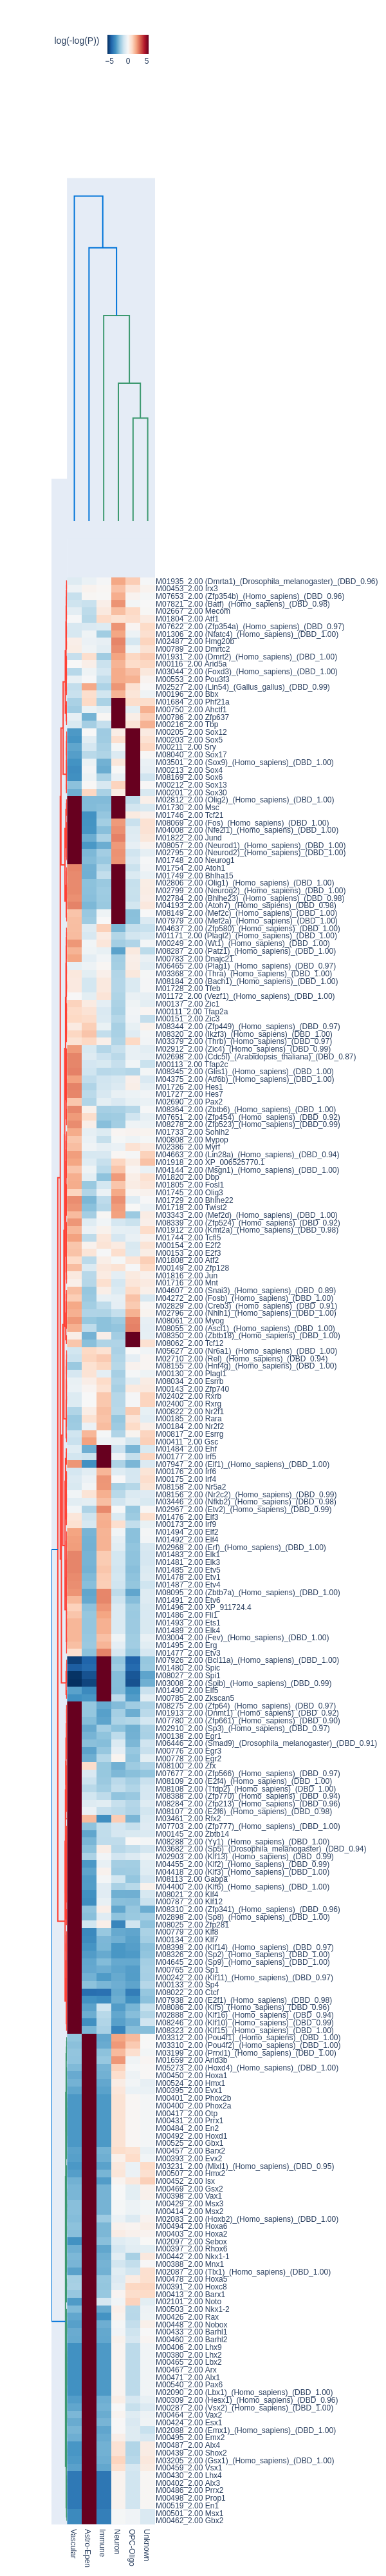

In [ ]:
snap.pl.motif_enrichment(motifs, max_fdr=0.0001, height=4000, interactive=False)

In [100]:
motifs = snap.tl.motif_enrichment(
    motifs=cis_bp_mouse(unique=True,path="data/motifdb/HOCOMOCOv11_full_MOUSE_mono_meme_format.meme"),
    regions=marker_peaks,
    genome_fasta=snap.genome.GRCm39,
)


2025-02-07 14:26:00 - INFO - Fetching 67574 sequences ...
2025-02-07 14:26:01 - INFO - Computing enrichment ...
100%|██████████| 531/531 [03:47<00:00,  2.33it/s]


In [108]:
fig = snap.pl.motif_enrichment(motifs, max_fdr=0.0001, height=4000, interactive=False)
with open('figures/motif_hocomoco.png', 'wb') as f:
    f.write(fig.data)  # Assuming 'im.data' contains the image data


In [109]:
motifs = snap.tl.motif_enrichment(
    motifs=cis_bp_mouse(unique=True,path="data/motifdb/cisBP_mouse.meme"),
    regions=marker_peaks,
    genome_fasta=snap.genome.GRCm39,
)
fig = snap.pl.motif_enrichment(motifs, max_fdr=0.0001, height=4000, interactive=False)
with open('figures/cisbp_pld.png', 'wb') as f:
    f.write(fig.data)  # Assuming 'im.data' contains the image data


2025-02-07 14:57:31 - INFO - Fetching 67574 sequences ...
2025-02-07 14:57:32 - INFO - Computing enrichment ...
100%|██████████| 639/639 [04:23<00:00,  2.42it/s]
